# Team NAGA
## (Nidhi, Alya, Garazi and Amber)

We chose this name for multiple reasons:
* It's an acronym of all our our names
* A naga is a <ins> serpent-like </ins> supernatural being, and we're using python
* Nagas originate from India, to which we all have a connection: Nidhi was born there, Alya has lived there and Amber just returned from travelling there

# Background Information

Your client is a medical research company, and you are asked to improve the early detection of breast cancer using machine learning. The goal of the project is to train a machine learning model which predicts whether the cancer is benign or malignant.

The dataset is composed of features computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of cell nuclei present in the image.

We will follow this plan for our project:
* I. Data Exploration 
* II. Data Visualisation
* III. Data Preprocessing
* IV. Model Selection
* V. Conclusion

# I. Data Exploration 

We import relevant libraries (pandas, numpy, matplotlib, seaborn) and load the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

dataset = pd.read_csv("data.csv")

We start with basic data analysis to check the data size, its attributes and any missing/null values in our dataset.

In [2]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 33)


In [3]:
# have a look at the head
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# describe the data
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# get the type of each attribute
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
# check for missing or null values
dataset.isnull().sum() # OR use dataset.isnull().values.any()
dataset.isna().sum() # OR use dataset.isna().values.any()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We observe that the dataset contains 569 records (images) and each record has 32 attributes. These include ID number, diagnosis (B = benign and M = malignant) and 30 real-valued input features.

10 different features are recorded, but there are three columns for each feature (mean, standard error and worst), hence resulting in the 30 remaining columns.The 'worst' value is the mean of the three largest values for that feature.

The features recorded to four significant figures are:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

We note that the id column is useless for classification along with the Unnamed:32 column which contains only null values. We also notice that the range of values between features is high too.

We will split the numerical columns and target categorical column separately while dropping the two unnecessary columns (Unnamed: 32 and id). 
We will also one hot encode the target as this will give a neutral representation of the data (i.e. does not assign an order) to perform analysis.
We will check once more now whether we have any null values to make sure we have removed them all.

In [7]:
int64_df = dataset.select_dtypes(include=['int64'])
object_df = dataset.select_dtypes(include=['object']).astype('category')
one_hot_df = pd.get_dummies(dataset, drop_first=True)
one_hot_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [8]:
target = one_hot_df['diagnosis_M']  
list = ['Unnamed: 32','id','diagnosis_M']
x = one_hot_df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#check if there is a null value in our x df
x.isnull().values.any()

False

# II. Data Visualisation

In order to gain a better understanding of our data we will use four different visualisations to find best feature candidates for our problem.

## Plot 1 - Bar Graph

We will plot the target feature to determine the number of patients which are diagnosed as malignant or benign . We observe that the class distribution is 357 benign, 212 malignant with a ratio of 0.59 which is a good sign for our analysis.

Number of Benign:  357
Number of Malignant :  212


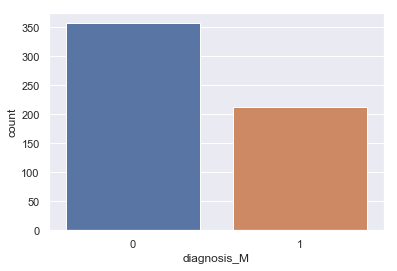

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x = target)       
B, M = target.value_counts(sort=True) #sorting to have B then M
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

## Plot 2 - Histogram
We then show the distribution of the features. We can see that features like concave_points_mean, smoothness_mean, symmetry_mean and perimeter_mean are skewed, so we could choose to omit them as features with gaussian distribution would be the most useful for our classifier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23519278>,
      dtype=object)

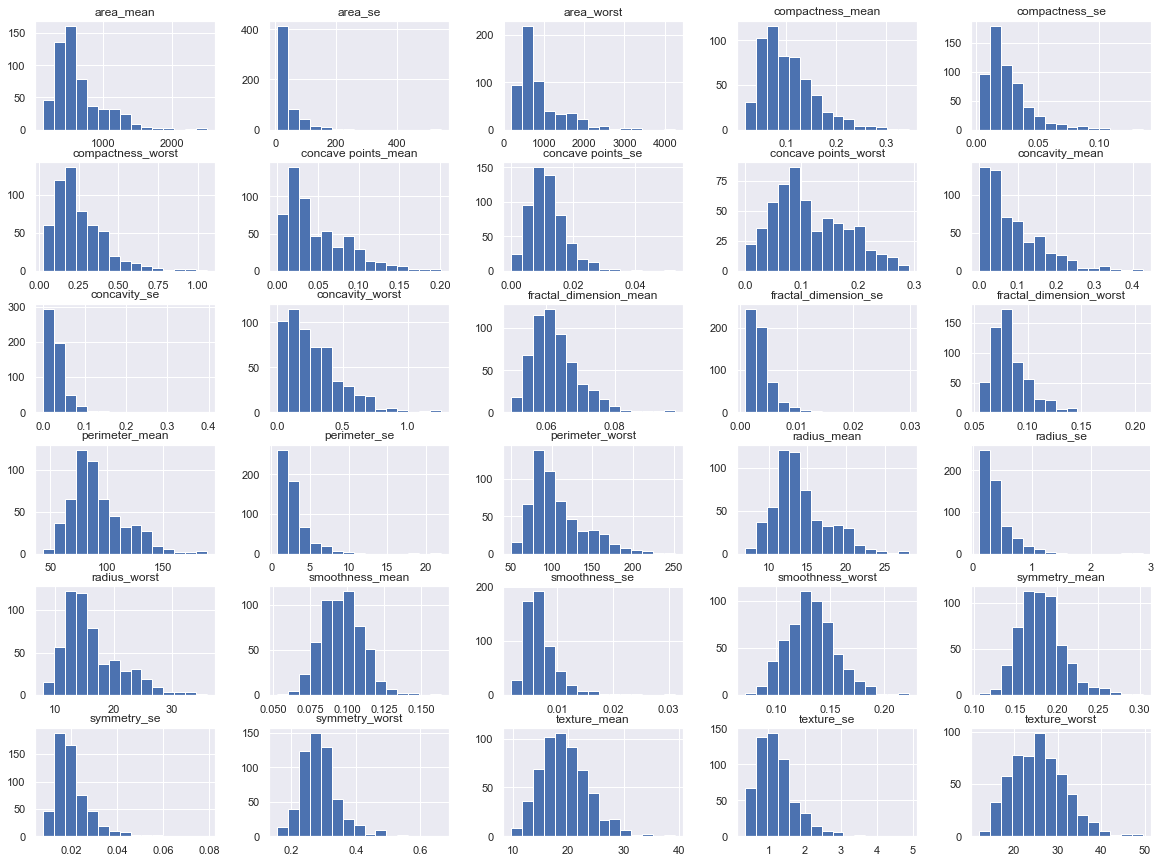

In [11]:
x.hist(bins=15, figsize=(20,15))

We normalise by standardization to put features on the same scale as some features like area_mean and concavity_mean have a big scale difference.The method takes a feature, compute its mean and standard deviation, then substract the feature by its mean, and divide the result by the standard deviation.

In [12]:
data = x
data_nor = (data - data.mean()) / (data.std())  

## Plot 3 - Violin Plot
We will then plot the features using a violin plot along its different quartiles. We know that features with similar distribution for both types of diagnosis should be considered for elimination, as this indicates they do not differentially affect each class (and therefore would be less useful in a classifier).

We can see for example that radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave_points_mean are good candidates for the classifier, as the 75 percentile of benign tumors is below the 25 percentile of malignant tumors. However, fractal_dimension_mean or texture_se have the same median for both tumor types, so should possibly be dropped.

In [13]:
def violin_plot(beginning,end):
    data = pd.concat([target,data_nor.iloc[:,beginning:end]],axis=1)
    data = pd.melt(data, id_vars="diagnosis_M", var_name="features", value_name='value')
    plt.figure(figsize=(13,10))
    sns.violinplot(x="features", y="value", hue="diagnosis_M", data=data, split=True, inner="quart")
    plt.xticks(rotation=90)

Violin plot of the 30 features


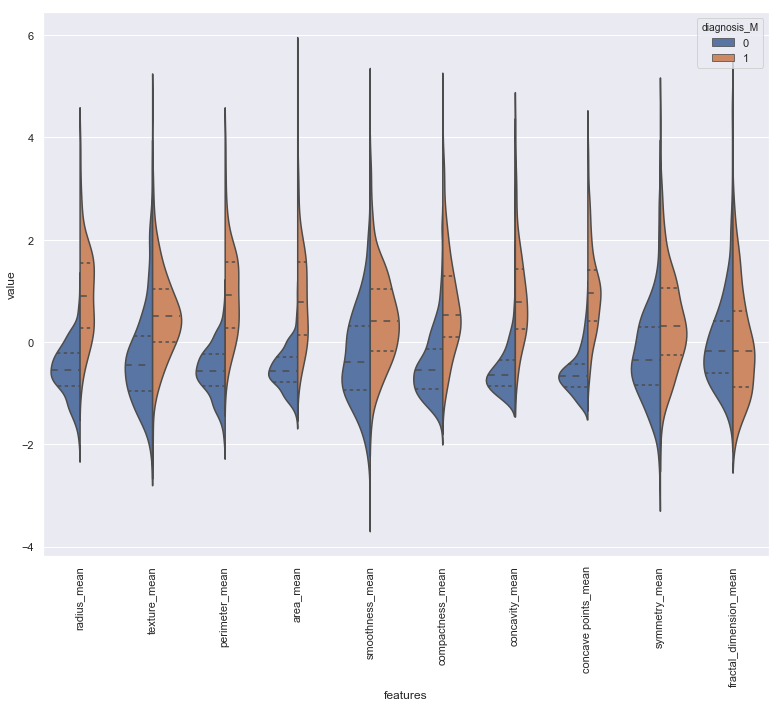

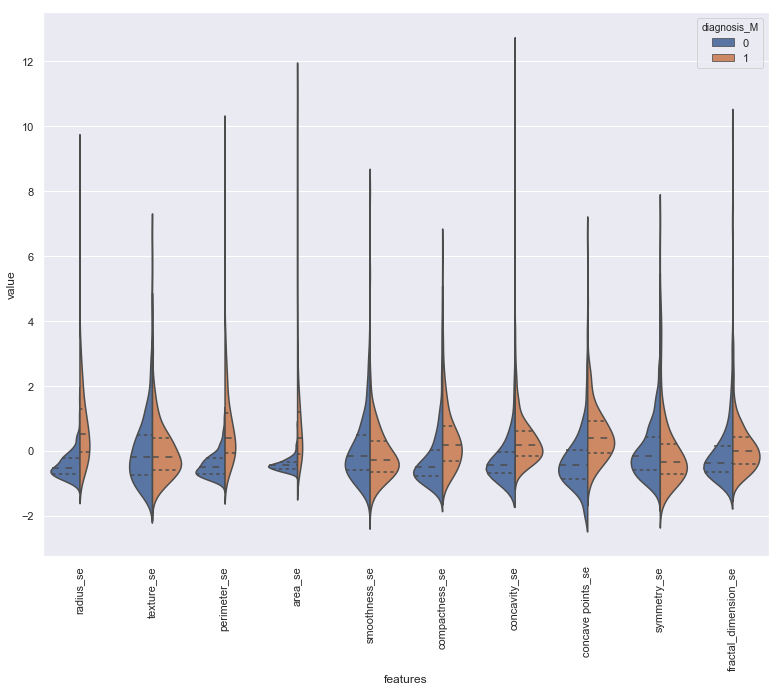

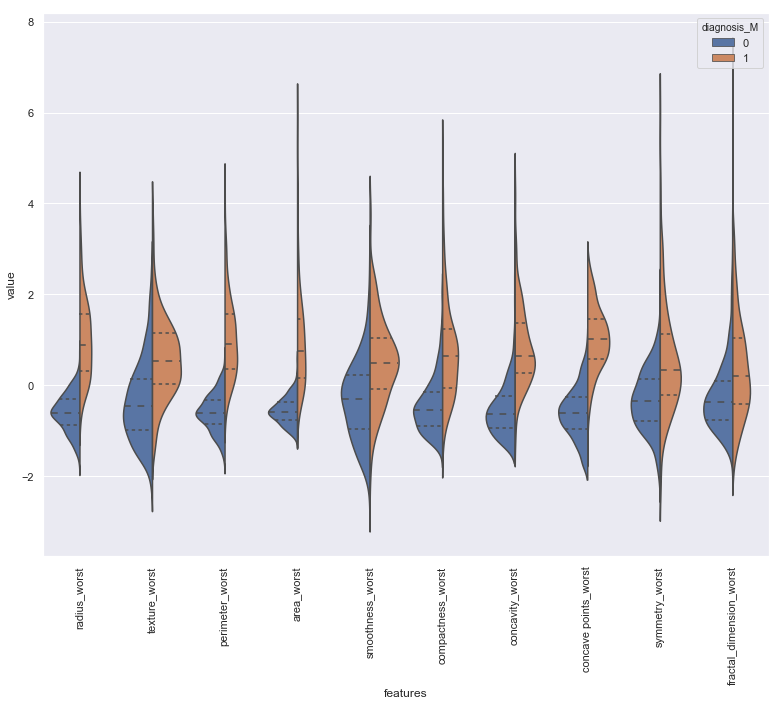

In [14]:
print("Violin plot of the 30 features")
violin_plot(0,10)
violin_plot(10,20)
violin_plot(20,31)

## Plot 4 - Correlation Matrix

We will then use the below correlation matrix to confirm our observations in order to eliminate the unnecessary features.

Correlation matrices / heatmaps display Pearson's Product Moment Correlation Coefficient. This can range from 1 (perfect positive correlation) to -1 (perfect negative correlation).**Therefore, we are interested in features whose coefficients are nearest to 1 or -1.**

Correlation map 1


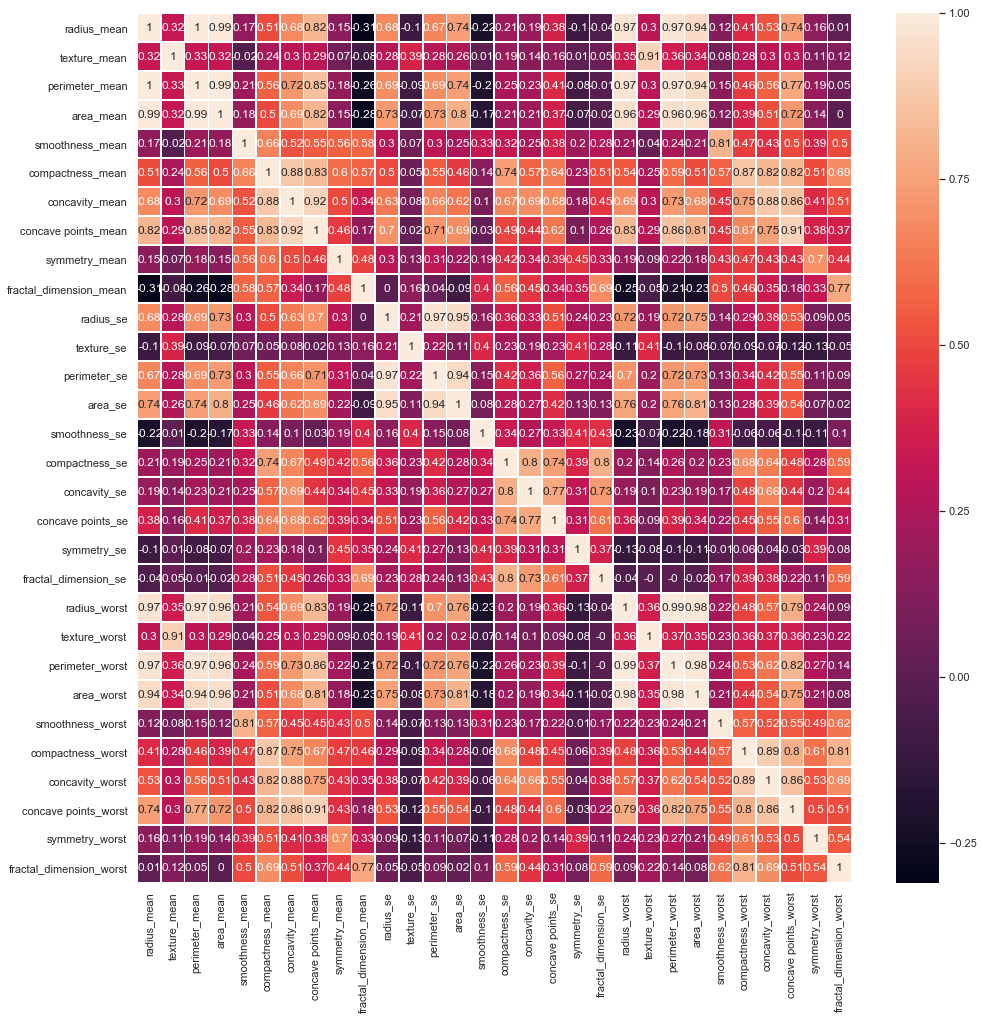

In [15]:
print("Correlation map 1")
plt.figure(figsize = (16,16))
correlation_matrix = x.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True,linewidths=.5)
plt.show()

Features that are correlated to each other can confound analyses, and so we removed some based on their correlation coefficients.

For example, we observed correlation between:
* area_worst and area_mean so we drop area_worst.
* texture_mean and texture_worst so we drop texture_worst.
* compactness_se, concavity_se and concave points_se so we keep only concavity_se.
* compactness_worst, concavity_worst and concave points_worst we keep only concavity_worst.
* radius_worst, perimeter_worst and area_worst so we drop all except area_worst.
* radius_se, perimeter_se and area_se so we drop all except area_se.
* Compactness_mean, concavity_mean and concave points_mean so we keep only concavity_mean.

Once we drop the above features, we plot once more another correlation matrix to see whether we eliminated all highly correlated features to obtain almost uncorrelated matrix.

In [16]:
#Dropping all unnecessary features after above analysis
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x1 = x.drop(drop_list,axis = 1 ) 
x1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


We observe that we obtained now an almost uncorrelated matrix.

Correlation map 2


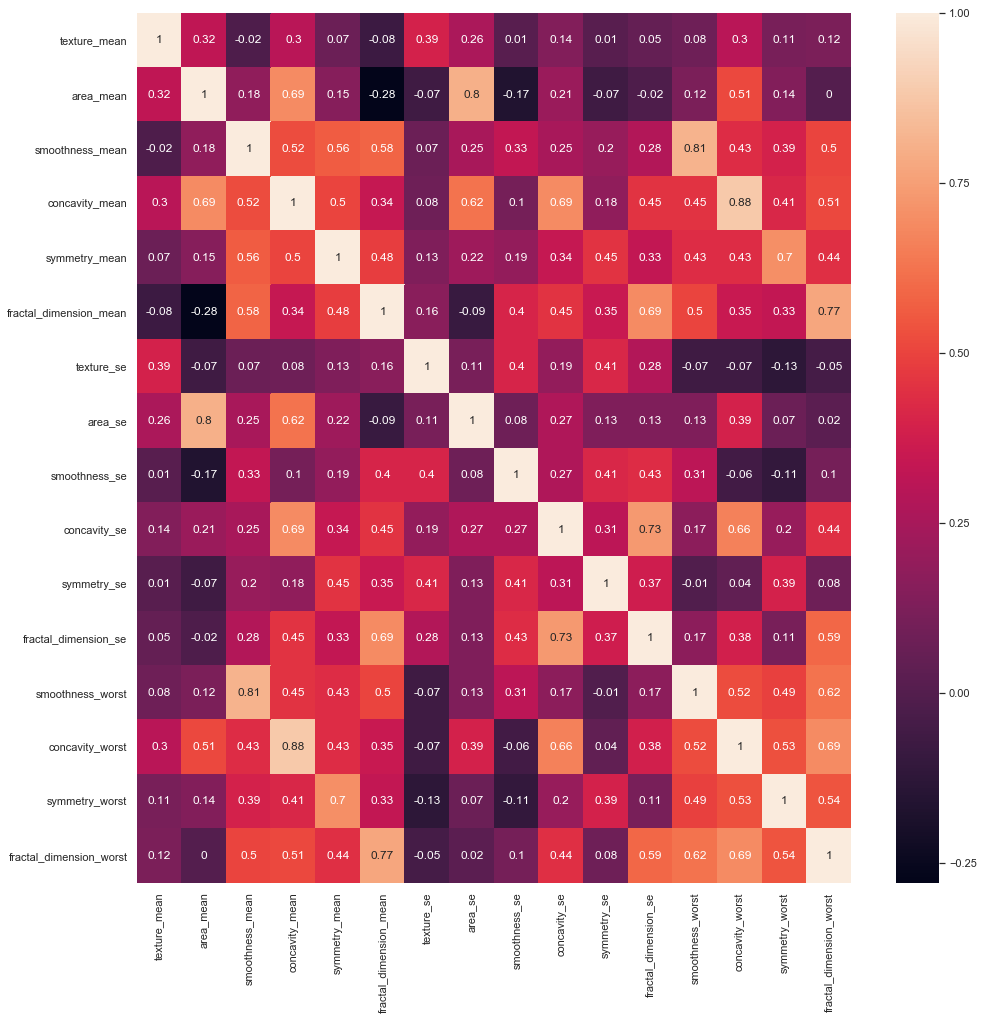

In [17]:
#Correlation map to check no remaining correlated features
print("Correlation map 2")
plt.figure(figsize = (16,16))
correlation_matrix = x1.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)
plt.show()

# III. Data Preprocessing

## Outlier Treatment

We explored creating different model versions by leaving outliers in and taking them out. We wanted to see how this affected model performance.

Our findings are summarised below.

In [18]:
# Identifying outliers using IQR
Q1 = x1.quantile(0.25)
Q3 = x1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

texture_mean                 5.630000
area_mean                  362.400000
smoothness_mean              0.018930
concavity_mean               0.101140
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
texture_se                   0.640100
area_se                     27.340000
smoothness_se                0.002977
concavity_se                 0.026960
symmetry_se                  0.008320
fractal_dimension_se         0.002310
smoothness_worst             0.029400
concavity_worst              0.268400
symmetry_worst               0.067500
fractal_dimension_worst      0.020620
dtype: float64


In [19]:
# Visualising outliers
visualise = ( x1 < (Q1 - 1.5 * IQR)) |(x1 > (Q3 + 1.5 * IQR))
# Visualise.head()
visualise[visualise == True].count()

texture_mean                7
area_mean                  25
smoothness_mean             6
concavity_mean             18
symmetry_mean              15
fractal_dimension_mean     15
texture_se                 20
area_se                    65
smoothness_se              30
concavity_se               22
symmetry_se                27
fractal_dimension_se       28
smoothness_worst            7
concavity_worst            12
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

Can see we have quite a few outliers for each column, but some of these records might overlap (so it might not be as many as it looks).

**We then created a subset of the data with the outliers removed and experimented with different modes of features selection (explained below) to see how this affected model performance.** The results are not shown here because there was a lot of code (and this notebook is already really long!), but we have them available if anyone wants to read them.

The different combinations we tried were as follows:
* Handpicked features, outliers left in
* Handpicked features, outliers removed
* PCA, outliers left in
* PCA, outliers removed

**On both occasions, we found that removing outliers reduced model (logistic regression) performance. This is likely because our dataset is already very small, and so removing values reduced learning capacity.** For example, for the version where we used PCA and removed outliers, 171 records were dropped. 114 of these were malignant, which is more than half the original number.

**Therefore, for the models below, we decided to keep outliers in the dataset.**

## Feature Selection

Feature selection is when you identify key features of interest and drop the ones that are not useful.

There is more than one way of doing this. Below are the options we explored.
* **RandomForestClassifier** to understand the gini importance of each feature
* **Using PCA** to reduce the feature space
* **Handpicking** by using the correlation matrix above to identify features most correlated with target

### RandomForestClassifier

Training a RandomForestClassifier gives us the gini importance of each feature which can be used to eliminate features that are not useful from the training set. The results were compared to the other methods of feature selection to come up with the comprehensive list of features used in the end.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

#splitting the train/test set

yRF = dataset['diagnosis']
xRF = x
X_trainRF, X_testRF, Y_trainRF, Y_testRF = train_test_split(xRF, yRF, test_size = 0.2, random_state = 0)

In [21]:
feat_labels = dataset.columns.to_list()
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_trainRF, Y_trainRF)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('id', 0.03710342435034064)
('diagnosis', 0.01554883378343388)
('radius_mean', 0.04592209768616284)
('texture_mean', 0.04238134664792835)
('perimeter_mean', 0.005995729611673693)
('area_mean', 0.01285682861503781)
('smoothness_mean', 0.05612409021699042)
('compactness_mean', 0.1101610406939852)
('concavity_mean', 0.004676952436550493)
('concave points_mean', 0.003676771193262978)
('symmetry_mean', 0.016355047707947986)
('fractal_dimension_mean', 0.004662555204148944)
('radius_se', 0.013073687978117064)
('texture_se', 0.03894868043008296)
('perimeter_se', 0.0042268456340128)
('area_se', 0.004839841438230864)
('smoothness_se', 0.0064978023842844675)
('compactness_se', 0.005383468469532267)
('concavity_se', 0.004843948816576589)
('concave points_se', 0.005243516897955951)
('symmetry_se', 0.10215124444191394)
('fractal_dimension_se', 0.01738564046940948)
('radius_worst', 0.12898101325950487)
('texture_worst', 0.10210891925279653)
('perimeter_worst', 0.012204593640394123)
('area_worst', 0.0

In [22]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.10
sfm = SelectFromModel(clf, threshold=0.10)

# Train the selector
sfm.fit(X_trainRF, Y_trainRF)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

compactness_mean
symmetry_se
radius_worst
texture_worst
compactness_worst


In [23]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_trainRF)
X_important_test = sfm.transform(X_testRF)

In [24]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, Y_trainRF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_testRF)

# View The Accuracy Of Our Full Feature Model
accuracy_score(Y_testRF, y_pred)

0.956140350877193

In [26]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model (5 features)
accuracy_score(Y_testRF, y_important_pred)

0.9736842105263158

### PCA

PCA reduces the dimensionality of the feature space, thereby addressing issues like feature correlation and multicollinearity.

It was clear that some of our features were highly correlated and perhaps collinear, for example measurements like radius, perimeter and area are all closely related.

We therefore experimented with applying PCA to our dataset with a simple logistic regression classifier (code not included here but the notebooks are available if anyone wants to see them). We found that using PCA generally boosted model performance.

That said, using PCA tends to reduce the explainability of a model. This is because each principal component is effectively a combination of features, so it is harder to see the effects of each feature individually. 

For this reason, we chose not to use it for our models below.

### Handpicking

It is possible to handpick features for the model based on the correlation coefficients in the matrix above. The most important features are those that have the largest absolute correlation coefficients with the target.

As we have demonstrated above, it also possible to remove features that are correlated to each other by looking at the correlation matrix.

### Conclusions

Summary of what we found through different modes of feature selection:
* RandomForestClassifier demonstrated that compactness_mean, symmetry_se, radius_worst, texture_worst and compactness_worst had the highest gini scores, and a model run with just these features had a better accuracy score than one with all features included
* PCA improved model performance but reduced explainability
* Handpicking was the simplest way to choose features

In the end, **we chose to handpick our features based on the correlation coefficients in the matrix, as this was a method we had all explored independently.**

## Train-Test Split

In [27]:
# Importing relevant modulesS
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Splitting the data into the Train and Test sets with ratio 80:20
# Stratify is used to ensure an equal representation of each class in the training and test sets
X_train, X_test, y_train, y_test = train_test_split(x1, target, test_size=0.2, random_state=0, stratify=target)

## Feature Scaling

Many of the machine learning algorithms use euclidean distance between data points in their computation. Having two features with different range of numbers will let the feature with bigger range dominate the algorithm.

Examples of algorithms where scaling helps are: Principal Component Analysis(PCA) , k-nearest neighbors(Knn) , Linear / Logistic regression. Scaling helps us avoid skewing towards high magnitude features.

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# IV. Model Selection

## Evaluation Metrics

For our target variable of diagnosis, benign is the negative class (0) and malignant is the positive class (1).

The metrics we could use to measure our model performance are as follows:

* Accuracy: the proportion of predictions a model gets right (TP + TN / TP + TN + FP + FN)

* Precision: the proportion of positive predictions a model gets right (TP / TP + FP)

* Recall: the proportion of actual positives that were identified correctly (TP / TP + FN)

Of the above metrics, **recall seems the most appropriate for this data**.

**As we are predicting disease, we want to minimise false negatives. A false negative would be a tumour being classified as benign when in fact it is malignant, and therefore the breast cancer would go undiagnosed. To minimise false negatives, we want to increase recall.**

That said, false positives are also important. False positives (when someone is diagnosed with breast cancer when they do not have it) could be traumatic for the individual (if the next step was chemotherapy or surgery) and expensive for the health service. Therefore, **we also want to minimise the false positive rate, which means increasing precision.**

There is a 'tug of war' between recall and precision, as increasing one decreases the other. **The F1 score is a harmonic mean of the two, with an F1 score of 1 indicating perfect recall and precision.**

### So, in summary:
* **We are mostly interested in recall to minimise false negatives, which would be extremely costly**
* **However we want to strike a balance with precision to minimise false positives, which are also costly**
* **Therefore the F1 score is important as well**

## Cross Validation

When assessing the performance of our models we used cross validation, which is important to model tuning. If you only split your data into two sets (train and test), and then tune the hyperparameters to improve the metrics, you are effectively fitting the model to the test set too. If the same data has been used to train and estimate the hyperparameters, the model will have a tendency to overfit, reducing performance in real life.

To prevent this, you use cross validation.

There are two methods of cross validation:
1. Split your data into three sets: training, validation and test
2. Split your data into two sets (train and test) and perform cross validation when assessing metrics

**We used the second method as we felt our dataset was too small to split into three sets.** We consistently used five folds for cross validation (cv=5).

## Model Options

##### Logistic Regression:

In order to form a baseline we began by looking at a simple Logisitic Regression. The results of this model were then compared to two other models: Random Forest and Linear SVM.

##### Random Forest:

Theory suggested that a Random Forest algorithm would be beneficial for several reasons:
* A faster processing time as actions are parallelizable, which means that the process can be split into multiple machines to run, resulting in a faster computation time
* A faster training / predicting time as generated forests are saved for future use
* Robust to outliers
* Handles unbalanced data and low bias with a moderate variance

##### Linear SVM:

We trialled several other models (KNeighborsClassifier, Linear SVM, Kernel SVM (SVC) and Naïve Bayes Algorithm), out of which Linear SVM gave the highest recall. As this is our metric of interest, we chose this one.

## Models Before Hyperparameter Tuning

### Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Average Cross Validation Score for Precision : 0.9878787878787879
Average Cross Validation Score for Recall : 0.9411764705882353
Average Cross Validation F1 Score : 0.9636194029850745


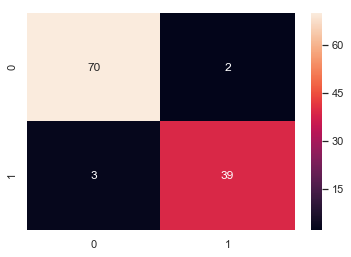

In [29]:
# Important relevant module
from sklearn.linear_model import LogisticRegression

# Training and testing the classifier
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)
y_pred_LR = classifier_LR.predict(X_test)

# Classification report
class_report_LR = classification_report(y_test, y_pred_LR)
print(class_report_LR)

# Confusion matrix and its ratios
cm_LR = confusion_matrix(y_test, classifier_LR.predict(X_test))
sns.heatmap(cm_LR, annot=True, fmt='d')

# Cross-validation scores
# Precision
cv_scores_precision = cross_val_score(classifier_LR, X_train, y_train, cv=5, scoring='precision')
print('Average Cross Validation Score for Precision : ' + str(cv_scores_precision.mean()))
# Recall
cv_scores_recall = cross_val_score(classifier_LR, X_train, y_train, cv=5, scoring='recall')
print('Average Cross Validation Score for Recall : ' + str(cv_scores_recall.mean()))
# F1
cv_scores_f1 = cross_val_score(classifier_LR, X_train, y_train, cv=5, scoring='f1')
print('Average Cross Validation F1 Score : ' + str(cv_scores_f1.mean()))

### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

   micro avg       0.93      0.93      0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Average Cross Validation Score for Precision: 0.9518178635090401
Average Cross Validation Score for Recall: 0.9058823529411765
Average Cross Validation F1 Score : 0.9268993587984806


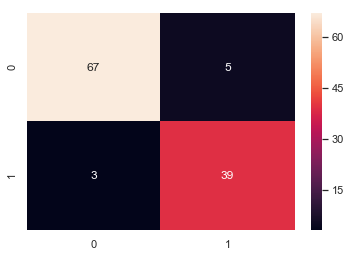

In [30]:
# Import relevant module
from sklearn.ensemble import RandomForestClassifier

# Training and testing the classifer
classifier_RF1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF1.fit(X_train, y_train)
y_pred_RF1 = classifier_RF1.predict(X_test)

# Classification report
class_report_RF1 = classification_report(y_test, y_pred_RF1)
print(class_report_RF1)

# Confusion matrix and its ratios
cm_RF1 = confusion_matrix(y_test, classifier_RF1.predict(X_test))
sns.heatmap(cm_RF1, annot=True, fmt='d')

# Cross-validation scores
# Precision
cv_scores_precision = cross_val_score(classifier_RF1, X_train, y_train, cv=5, scoring='precision')
print('Average Cross Validation Score for Precision: ' + str(cv_scores_precision.mean()))
# Recall
cv_scores_recall = cross_val_score(classifier_RF1, X_train, y_train, cv=5, scoring='recall')
print('Average Cross Validation Score for Recall: ' + str(cv_scores_recall.mean()))
# F1
cv_scores_f1 = cross_val_score(classifier_RF1, X_train, y_train, cv=5, scoring='f1')
print('Average Cross Validation F1 Score : ' + str(cv_scores_f1.mean()))

### Linear SVM

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Average Cross Validation Score for Precision : 0.9882352941176471
Average Cross Validation Score for Recall : 0.9470588235294117
Average Cross Validation F1 Score : 0.966788681029243


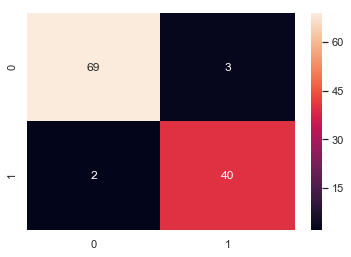

In [31]:
# Import relevant module
from sklearn.svm import SVC

# Training and testing the classifier
classifier_LSVM = SVC(kernel = 'linear', random_state = 0, probability = True)
classifier_LSVM.fit(X_train, y_train)
y_pred_LSVM = classifier_LSVM.predict(X_test)

# Classification report
class_report_LSVM = classification_report(y_test, y_pred_LSVM)
print(class_report_LSVM)

# Confusion matrix and its ratios
cm_LSVM = confusion_matrix(y_test, classifier_LSVM.predict(X_test))
sns.heatmap(cm_LSVM, annot=True, fmt='d')

# Cross-validation scores
# Recall
cv_scores_precision = cross_val_score(classifier_LSVM, X_train, y_train, cv=5, scoring='precision')
print('Average Cross Validation Score for Precision : ' + str(cv_scores_precision.mean()))
# Recall
cv_scores_recall = cross_val_score(classifier_LSVM, X_train, y_train, cv=5, scoring='recall')
print('Average Cross Validation Score for Recall : ' + str(cv_scores_recall.mean()))
# F1
cv_scores_f1 = cross_val_score(classifier_LSVM, X_train, y_train, cv=5, scoring='f1')
print('Average Cross Validation F1 Score : ' + str(cv_scores_f1.mean()))

### Comparison of Metrics

**These are the metric scores obtained from cross validation, demonstrating how the models performed on training data** (same as above, just put in one place for ease of comparison).

The comparison of these scores will inform us for hyperparameter tuning.

In [32]:
# Creating simple summary table
MM = {'Precision': [0.988, 0.952, 0.988], 'Recall': [0.941, 0.906, 0.947], 'F1': [0.964, 0.927, 0.967]}
model_metrics_no_HPs = pd.DataFrame(data=MM, index=['Logistic Regression', 'Random Forest', 'LVSM'])
print(model_metrics_no_HPs)

                     Precision  Recall     F1
Logistic Regression      0.988   0.941  0.964
Random Forest            0.952   0.906  0.927
LVSM                     0.988   0.947  0.967


From this we can see that, without any hyperparameter tuning, LSVM performed best on our training data.

## Models After Hyperparameter Tuning

Hyperparameters are values used to control the learning process of a machine learning algorithm. 'Tuning' hyperparameters refers to the process of selecting values which optimise the learning process, so that the model can better solve the problem.

We tuned the hyperparameters of all of our models and observed the effect it had on performance.

### Logistic Regression

In [33]:
# Import relevant modules
from sklearn.model_selection import GridSearchCV

# Naming the classifier
clf_LR = LogisticRegression()

# Defining parameters
# Penalty of L1 is lasso, L2 is ridge regression
# Try various values of C; smaller value means more regularisation
# Initially tried -3,3,7 for C but changed it to 0,10,1 as we don't want the weight to be negative
grid_values = {"C":np.logspace(0,10,1), "penalty":["l1","l2"]}

# Calling grid search
# this is different to what I did, I didn't do param grid = or scoring=recall
grid_clf_acc = GridSearchCV(clf_LR, param_grid = grid_values, cv=5, scoring = 'recall')
# Fitting grid search to the training data
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [34]:
# Saving the best estimator as a variable
LR_best = grid_clf_acc.best_estimator_
print(LR_best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Tried to add in best_score_ to show the cross validation scores on the training set, but kept getting the error saying 'AttributeError: 'LogisticRegression' object has no attribute 'best_score_'

Did not have time to investigate this as it was a last minute addition, however we understand that:
* **Comparing the cross validation scores shows you how the model performed on the training data, so you can tune the hyperparameters**
* **Comparing the evaluation metrics on the test data (below) shows you how the model would perform in real life**

Accuracy Score : 0.956140350877193
Precision Score : 0.9512195121951219
Recall Score : 0.9285714285714286
F1 Score : 0.9397590361445782


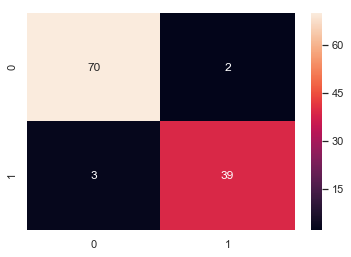

In [35]:
# Use best estimator to make predictions on the test data
y_pred_LR_with_HPs = LR_best.predict(X_test)

# New model evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_LR_with_HPs)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_LR_with_HPs)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_LR_with_HPs)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_LR_with_HPs)))

# Logistic Regression (Grid Search version) confusion matrix
cm_LR_with_HP = confusion_matrix(y_test,y_pred_LR_with_HPs)
sns.heatmap(cm_LR_with_HP,annot=True,fmt='d')

### Random Forest

In [36]:
# Importing relevant modules
from sklearn.ensemble import RandomForestClassifier

# Naming the classifier
RFC = RandomForestClassifier(random_state = 0)

# Defining parameters
# say what they all mean?
param_grid = [
    # Inititally tried 3, 10, 30 for n_estimators, and best estimator came out as 30, so we added 50 to the list
    # best_estimator then came out as 50, so tried adding 100 to the list but it stayed as 50
    # max_features goes up to 16 as this is the no. of features in our x_data
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 16]},
    # We tried some combinations with bootstrap set as False
    # bootstrap=True splits the data, but as our dataset is small we thought false might be better
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# Calling grid search
# Train across 5 folds, giving a total of 90 rounds of training ((12 + 6)*5)
grid_search = GridSearchCV(RFC, param_grid, cv=5, scoring = 'recall')
# Fitting grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 16]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [37]:
# Saving the best estimator as a variable
RF_best = grid_search.best_estimator_
print(RF_best)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Tried to add in best_score_ to show the cross validation scores on the training set, but kept getting the error saying 'AttributeError: 'RandomForestClassifier' object has no attribute 'best_score_'

Did not have time to investigate this as it was a last minute addition, however we understand that:
* **Comparing the cross validation scores shows you how the model performed on the training data, so you can tune the hyperparameters**
* **Comparing the evaluation metrics on the test data (below) shows you how the model would perform in real life**

In [38]:
# Use best estimator to make predictions on the test data
y_pred_RF_with_HPs = RF_best.predict(X_test)

In [39]:
# New model evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_RF_with_HPs)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_RF_with_HPs)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_RF_with_HPs)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_RF_with_HPs)))

Accuracy Score : 0.956140350877193
Precision Score : 0.9302325581395349
Recall Score : 0.9523809523809523
F1 Score : 0.9411764705882352


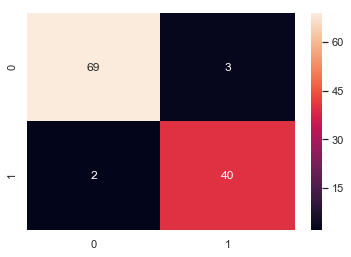

In [40]:
# Random Forest (Grid Search version) confusion matrix
cm_RF_with_HPs = confusion_matrix(y_test,y_pred_RF_with_HPs)
sns.heatmap(cm_RF_with_HPs,annot=True,fmt='d')

### Linear SVM

In [41]:
# Naming classifer
SVM_clf = SVC(kernel = 'linear', random_state = 0, probability=True)

# Defining parameters
params = {'C': [0.1, 1, 10, 100]}

# Calling grid serach
SVM_grid = GridSearchCV(SVM_clf, params, cv=5, scoring = 'recall')
# Fitting grid search to the training data
SVM_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [42]:
# Saving the best estimator as a variable
SVM_best = SVM_grid.best_estimator_
print(SVM_best)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False)


Tried to add in best_score_ to show the cross validation scores on the training set, but kept getting the error saying 'AttributeError: 'SVM' object has no attribute 'best_score_'

Did not have time to investigate this as it was a last minute addition, however we understand that:
* **Comparing the cross validation scores shows you how the model performed on the training data, so you can tune the hyperparameters**
* **Comparing the evaluation metrics on the test data (below) shows you how the model would perform in real life**

In [43]:
# Use new parameters to make predictions on the test data
y_pred_SVM_with_HPs = SVM_best.predict(X_test)

Accuracy Score : 0.956140350877193
Precision Score : 0.9302325581395349
Recall Score : 0.9523809523809523
F1 Score : 0.9411764705882352


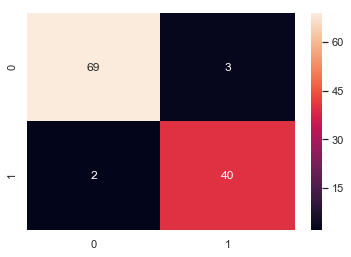

In [44]:
# New model evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_SVM_with_HPs)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_SVM_with_HPs)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_SVM_with_HPs)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_SVM_with_HPs)))

# SVM (Grid Search version) confusion matrix
cm_SVM_with_HPs = confusion_matrix(y_test,y_pred_SVM_with_HPs)
sns.heatmap(cm_SVM_with_HPs,annot=True,fmt='d')

## Ensemble Learning

Ensemble learning is when numerous models are combined to predict output. Some advantages of this are:
* It can reduce overfitting by taking an average across the models included
* It can combine a selection of weaker models into a powerful committee; each model has different strengths and weaknesses, which are combined and compensated for when you combine them together

To do this, we used VotingClassifier and set 'voting=soft', which means that the output (probability of class 1, malignant) was calculated from an average of its probability across all included classifiers.

**The code below combines our original models (before hyperparameter tuning) into an ensemble and then applies grid search to the ensemble as a whole (to tune the hyperparameters).**

In [45]:
# Import relevant module
from sklearn.ensemble import VotingClassifier

# Defining classifiers as those we created above (before HP tuning)
clf1 = classifier_LR
clf2 = classifier_RF1
clf3 = classifier_LSVM

# Creating an ensemble of our classifiers
# voting=soft means that the output class is calculated from average probability from all classifiers included the ensemble
eclf = VotingClassifier(estimators=[
            ('lr', clf1), ('rf', clf2), ('svm', clf3)],
            voting='soft')

# Defining parameters for grid search
params = {'lr__C': [1.0, 100.0],
        'rf__n_estimators': [20, 200]}

# Calling grid search on the ensemble
ensemble_grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, scoring = 'recall')
ensemble_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=...=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [46]:
# Saving the best estimator as a variable
ensemble_best = ensemble_grid.best_estimator_
print(ensemble_best)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFores...inear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


Tried to add in best_score_ to show the cross validation scores on the training set, but kept getting the error saying 'AttributeError: 'VotingClassifier' object has no attribute 'best_score_'

Did not have time to investigate this as it was a last minute addition, however we understand that:
* **Comparing the cross validation scores shows you how the model performed on the training data, so you can tune the hyperparameters**
* **Comparing the evaluation metrics on the test data (below) shows you how the model would perform in real life**

In [47]:
# Using best estimator from grid search to make predictions on the test data
y_pred_ensemble = ensemble_best.predict(X_test)

Accuracy Score : 0.9736842105263158
Precision Score : 0.975609756097561
Recall Score : 0.9523809523809523
F1 Score : 0.963855421686747


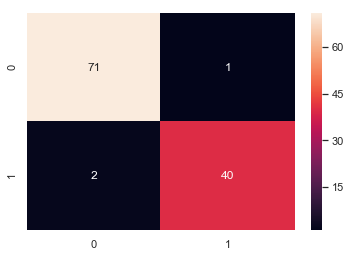

In [48]:
# Ensemble evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_ensemble)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_ensemble)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_ensemble)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_ensemble)))

# Ensemble confusion matrix
cm_ensemble = confusion_matrix(y_test,y_pred_ensemble)
sns.heatmap(cm_ensemble,annot=True,fmt='d')

### Comparison of Model Metrics

**These are the metric scores obtained when we applied these models to the <ins> test</ins> set, to see how the models would perform in real life** (same as above, just put in one place for ease of comparison).

In [49]:
# Creating simple summary table
MM3 = {'Precision': [0.951, 0.930, 0.930, 0.976], 'Recall': [0.929, 0.952, 0.952, 0.952], 'F1': [0.940, 0.941, 0.941, 0.964]}
model_metrics_no_HPs = pd.DataFrame(data=MM3, index=['Logistic Regression', 'Random Forest', 'LVSM', 'Ensemble'])
print(model_metrics_no_HPs)

                     Precision  Recall     F1
Logistic Regression      0.951   0.929  0.940
Random Forest            0.930   0.952  0.941
LVSM                     0.930   0.952  0.941
Ensemble                 0.976   0.952  0.964


As we can see from the above, the ensemble had the highest precision, recall and F1 score.

**Therefore, we have chosen the ensemble model as it performs better on this data than the other models tested. This is what we expected, given the nature of ensemble learning.**

## Comparing Models with ROC

As we had chosen our final model (the ensemble arrangement), we plotted an ROC curve to illustrate its performance compared to the other models we tried.

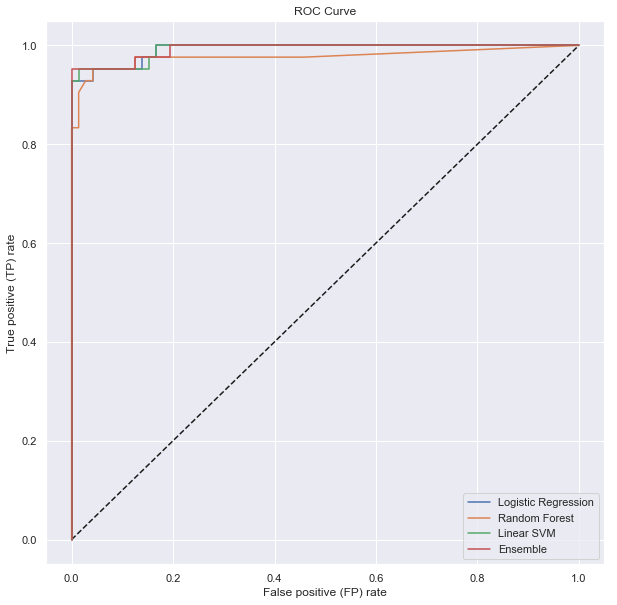

In [50]:
# Importing relevant module
from sklearn import metrics

# Predict probabilities of class 1 (malignant) for all models
LR_pred = LR_best.predict_proba(X_test)[:, 1]
RF_pred = RF_best.predict_proba(X_test)[:, 1]
SVM_pred = SVM_best.predict_proba(X_test)[:, 1]
ensemble_pred = ensemble_best.predict_proba(X_test)[:, 1]

# Obtaining false positive rate and the true positive rate to build the ROC curve
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test, LR_pred)
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test, RF_pred)
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test, SVM_pred)
fpr_ensemble, tpr_ensemble, _ = metrics.roc_curve(y_test, ensemble_pred)

# Plotting the ROC curve
fig = plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LR, tpr_LR, label='Logistic Regression')
plt.plot(fpr_RF, tpr_RF, label='Random Forest')
plt.plot(fpr_SVM, tpr_SVM, label='Linear SVM')
plt.plot(fpr_ensemble, tpr_ensemble, label='Ensemble')
plt.xlabel('False positive (FP) rate')
plt.ylabel('True positive (TP) rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

**We think the curve looks jagged and not smooth because we had a small dataset, i.e. few data points to plot into a curve.**

We then calculated the AUC scores. A perfect classifier would have a score of AUC = 1.

In [51]:
# Comparing AUC scores

# Calculating AUC scores
LR_auc = metrics.roc_auc_score(y_test, LR_pred)
RF_auc = metrics.roc_auc_score(y_test, RF_pred)
SVM_auc = metrics.roc_auc_score(y_test, SVM_pred)
ensemble_auc = metrics.roc_auc_score(y_test, ensemble_pred)

print("AUC scores for each model -")
print()
print("Logistic Regression: %.4f" %LR_auc)
print("Random Forest: %.4f" %RF_auc)
print("SVM: %.4f" %SVM_auc)
print("Ensemble: %.4f" %ensemble_auc)

AUC scores for each model -

Logistic Regression: 0.9917
Random Forest: 0.9772
SVM: 0.9921
Ensemble: 0.9924


This again confirms our selection as the ensemble model had the best AUC score.

# V. Conclusion

## What Went Well
* Our visualisations (violin plots and correlation matrix heatmap) clearly indicated features of importance, plus the fact that there were correlations between features (unfavourable and important to note)
* We explored feature selection in depth using various methods (RandomForest, PCA and handpicking)
* All three of our models performed fairly well, with the ensemble performing best

## What Else We Could Have Done 
* Could have further investigated correlation / multicollinearity of features with VIF (variance inflation factor)
* Could have tried KNeighborsClassifier, as this also had a high recall score similar to LSVM
* Could have tried other ensemble methods as we know ensemble methods tend to work better than single models (we tried Random Forest and VotingClassifier, but we could have tried boosting for example)
* Could have added in a precision-recall curve for the ensemble model to indicate threshold value
* Could have tried using RandomisedSearch instead of GridSearch, which we know can perform better than GridSearch (as each tree uses a random combination of features and then takes an average, thereby giving a better overall output and reducing overfitting). Overfitting it common with small datasets and so RandomisedSearch may have been a better option
* Could have combined our models with tuned hyperparameters into an ensemble, which would have added another layer to the ML process